In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

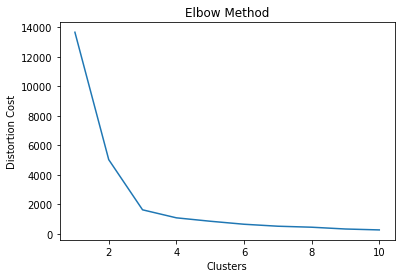

In [22]:
"""Using elbow method(To get the correct number of clusters)"""
#Toy Dataset
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
cost=[]
xlimit=np.arange(1,11)
for k in range(1,11):#k is the number of clusters
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(df)#Fit the dataset
    y_pred=kmeans.labels_#Label the prediction
    cost.append(kmeans.inertia_)#inertia gives the cost'
plt.plot(xlimit,cost)
plt.xlabel("Clusters")
plt.ylabel("Distortion Cost")
plt.title("Elbow Method")
plt.show()

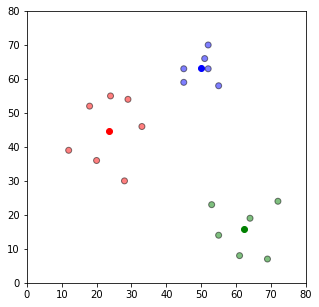

In [23]:
"""Utilising the elbow method for Kmeans"""
#As can be seen from the above graph, it has an elbow at n_clusters=3
#Hence the number of clusters to be chosen is 3
kmeans=KMeans(n_clusters=3)#Number of cluster declaration
kmeans.fit(df)#fit the dataset
labels = kmeans.predict(df)#Label prediction
centroids = kmeans.cluster_centers_#Getting the cluster centers
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = map(lambda x: colmap[x+1], labels)
colors=list(colors)

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()